# Уменьшение клоичества цветов изображения

Данное задание основано на материалах лекций по методу k-средних (K-Means). 

## Вы научитесь: 

• использовать алгоритм K-Means

• работать с задачами обучения без учителя

• работать с изображениям в Python

## Введение
Самый распространенный тип задач машинного обучения — это задачи обучения с учителем. В них имеется обучающая выборка, для каждого объекта которой есть ответ, и нужно научиться предсказывать эти ответы для новых объектов. В такой постановке можно строго определить критерии качества.
Если же имеются лишь объекты, а ответов для них нет, то все равно можно пытаться найти в данных некую структуру. Задачи, которые ищут закономерности в неразмеченных выборках, называют задачами обучения без учителя. Типичный пример такой задачи — кластеризация, где требуется найти группы похожих объектов.
Кластеризация может использоваться для самых разных целей. В этом задании мы попробуем группировать схожие пиксели на изображении. Такой подход позволяет переходить к суперпиксельному представлению изображений, которое является более компактным и лучше подходит для решения ряда задач компьютерного зрения.

## Реализация в SKlearn

Зарузим изображение parrots.jpg:

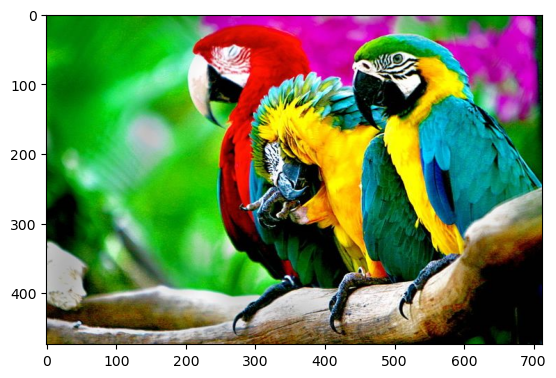

In [1]:
from skimage.io import imread
import pylab
image = imread('parrots.jpg')
pylab.imshow(image)

Преобразуем все значения в интервал от 0 до 1:

In [2]:
from  skimage import img_as_float
imgFloat=img_as_float(image)
del image

Создадим матрицу объектов-признаков: охарактеризуем каждый пиксель как систему координат значений интенсивности в формате RGB:

In [3]:
imgMatrix={}

index=0
for x in range(len(imgFloat)):
    for y in range(len(imgFloat[x])):
        imgMatrix[index]=imgFloat[x][y]
        index+=1

import pandas as pd
X_train=pd.DataFrame(imgMatrix).transpose()
X_train.columns=['R','G','B']
del imgMatrix
etalon=X_train.copy()

Запустим алгоритм K-Means с параметрами init='k-means++' и random_state=241. Измерим качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно. Найдём минимальное количество кластеров, при котором значение PSNR выше 20:

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import math
from sklearn.cluster import KMeans
def psnr(X,X_train_true):
        mse=0
        for col in X_train_true.columns:
            mse+=((X[col]-X_train_true[col])**2).sum()
        mse/=len(X_train_true)*3
        return 10*math.log10(1/mse)

for clst in range(21):
    X_train=etalon.copy()
    maxClusters=clst+1
    cls=KMeans(init='k-means++',random_state=241,n_clusters=maxClusters)
    kmeans = cls.fit(X_train)
    X_train['cluster']=kmeans.labels_
    X_train.set_index('cluster', inplace=True)
    X_train2=X_train.copy()
    X_train_true=X_train.copy()
    for cluster in range(maxClusters):
        for col in X_train.columns:
            median=X_train.loc[cluster,col].median()
            X_train.loc[cluster,col]=median
            mean=X_train2.loc[cluster,col].mean()
            X_train2.loc[cluster,col]=mean

    psnrMedian=psnr(X_train,X_train_true)
    psnrMean=psnr(X_train2,X_train_true)
    print("Clusters count %d, psnrMedian=%f, psnrMean=%f" % (maxClusters,psnrMedian,psnrMean))
    if (psnrMedian>=20) | (psnrMean>=20): break

Clusters count 1, psnrMedian=9.460408, psnrMean=9.837759
Clusters count 2, psnrMedian=11.683460, psnrMean=12.112036
Clusters count 3, psnrMedian=12.807503, psnrMean=13.176026
Clusters count 4, psnrMedian=14.037911, psnrMean=14.394294
Clusters count 5, psnrMedian=15.206562, psnrMean=15.559946
Clusters count 6, psnrMedian=16.082353, psnrMean=16.572725
Clusters count 7, psnrMedian=17.366035, psnrMean=17.671923
Clusters count 8, psnrMedian=18.175620, psnrMean=18.468134
Clusters count 9, psnrMedian=18.851031, psnrMean=19.144870
Clusters count 10, psnrMedian=19.450611, psnrMean=19.675498
Clusters count 11, psnrMedian=19.898109, psnrMean=20.162161
